# Single Unit Properties at Zillow: Predicting Values and Identifying Drivers
***
***

# Goals

This project has two goals
- Identify variables that have a strong impact on the values of single unit properties that the tax district assesses
- Create a model that will accurately predict the values of single unit properties that the tax district assesses

We will also be providing a presentation that summarizes the findings of this project (link to presentation slides below).

https://docs.google.com/presentation/d/16aubNotM82Ej5DSp-u9sU1O6pjYjxIoKPAfXCNA3hpo/edit?usp=sharing

In [1]:
# Establishing environment
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from env import host, user, password
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE
from acquire import get_zillow_data
from prepare import prep_zillow_data

import warnings
warnings.filterwarnings("ignore")

# Acquire
Acquire data from the customers table from the zillow database on the codeup data science database server.


We will also be taking the functions from this phase and creating an __acquire.py__ file so our work can be easily replicated.
***

### Using get_zillow_data (acquire.py) function to acquire data from zillow SQL database

In [2]:
# creating dataframe using data acquired from function
df = get_zillow_data()

# previewing data to ensure function operates correctly
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,parcelid,logerror,transactiondate
0,2061546,11289917,1.0,None,None,2.0,3.0,NaN,6.0,2.0,...,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,11289917,-0.362001,2017-06-23
1,1834372,11705026,NaN,None,None,1.0,2.0,NaN,6.0,1.0,...,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,11705026,-0.146056,2017-06-30
2,2121349,11389003,NaN,None,None,2.0,3.0,NaN,6.0,2.0,...,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,3273,11389003,-0.325393,2017-06-01
3,2093710,11967869,NaN,None,None,1.0,2.0,NaN,5.0,1.0,...,2016.0,191821.0,3267.47,None,NaN,6.037185e+13,3429,11967869,-0.005566,2017-06-29
4,1288537,12035176,NaN,None,None,1.0,1.0,NaN,11.0,1.0,...,2016.0,146810.0,2926.19,None,NaN,6.037189e+13,5444,12035176,-0.114435,2017-05-24


### Acquire Takeaways

- Acquiring data from zillow database on the codeup data science database server via the __get_zillow_data__ function
- The function is available in the __acquire.py__ file deliverable

# Prepare

After throughouly examining the data, we created a list of changes that would need to be made in order to prepare the data for exploration.

The list of changes is located in the __Prepare Takeaways__ section below and __prep_zillow_data__ (prepare.py) function will carry out those changes in the cell below.
***

In [3]:
# preparing data with changes outlined in takeaways below
train, y_train, y_validate, y_test, X_train_scaled, X_train, X_validate, X_test, X_validate_scaled, X_test_scaled\
= prep_zillow_data(df)

## Prepare Takeaways
- No duplicate rows found in data set
    - Each row should have a unique ID at minimum so any duplicate rows would have been erroneous and removed as a result
    
- Removing columns that meet any of the following criterion:
    - More than 2,000 row missing
    - Duplicates or near-duplicates of other columns
    - Contain data that's irrelevant to our project
    - Categorical with more than 5 unique values
    - Contain only 1 unique column
    - Are prohibited from being used per project spefications

- Rename remaining columns for readability and understanding

- Chosen columns all have appropriate data types so we won't need to change them

- Drop rows with missing values since this accounts for less than 3% of all rows

- Scale every non-target variable column. (ie. everything except taxvaluedollarcnt)

- Split all data into train, validate and test samples

All of these changes will be done via the __prep_zillow_data__ function within the __prepare.py__ file deliverable

# Explore
We will explore our prepped data to identify drivers of property value and relationships between variables.
***

We begin by creating a heatmap of that includes each of the features we retained from our prep phase:
- unit_sq_ft (formerly calculatedfinishedsquarefeet) 
- bedroom_count (formerly bedroomcnt)                    
- bathroom_count (formerly bathroomcnt)
- lot_size_sq_ft (formerly lotsizesquarefeet) 

<AxesSubplot:title={'center':'Variable Heatmap'}>

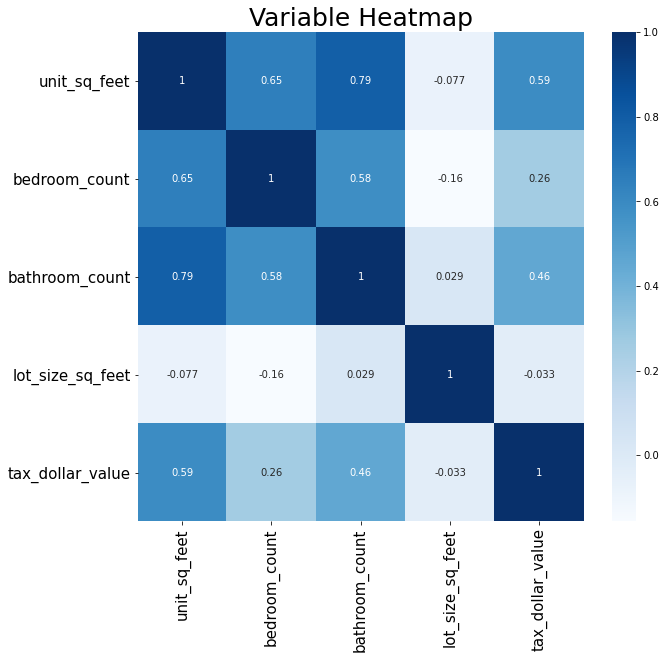

In [4]:
# creating copy of train DF to avoid altering the original
hmap_train = train.copy()

# creating scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

# fitting scaler to train data
scaler.fit(hmap_train)

# scaling train data and converting to data frame
hmap_train = pd.DataFrame(scaler.transform(hmap_train))

# renaming columns as they were erased in the DF conversion
hmap_train.rename(columns={0: 'unit_sq_feet', 1: 'bedroom_count', 2: 'bathroom_count', 3: 'lot_size_sq_feet', 4: 'tax_dollar_value' }, inplace=True)

# plotting heatmap
plt.figure(figsize=(10,9))

plt.ylim(0, 4)
plt.title('Variable Heatmap', fontsize = 25)
plt.xlabel('Features', fontsize = 22)
plt.ylabel('Features', fontsize = 22)
plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15, rotation=45)

sns.heatmap(hmap_train.corr(), cmap='Blues', annot=True)

- Given their strong tones and coefficients when applied to tax_dollar_value, bathroom_count, bedroom_count and unit_sq_ft all appear to be strong drivers of property value.

- Unit_sq_ft, bathroom_count, and bedroom_count also show strong correlation with one another. 
    - This may be becuase larger propertys tend to have more bathrooms and bedrooms while smaller propertys tend to have less.

- Given it's weak coloring and low coefficient, lot_size_sq_feet appears to be a weak driver of property value.

- We will create hypothesis tests and visualizations to further explore each of these features in more depth.

## Feature: unit_sq_feet

### Initial idea: The value of a property is impacted by how large it is. 

Text(0.5, 0, 'Unit Square Feet')

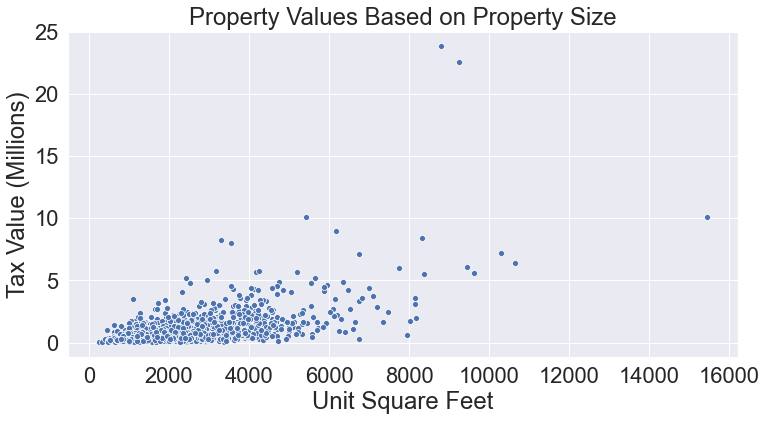

In [5]:
# creating scatterplot of tax dollar value vs unit sq feet
sns.set(rc = {'figure.figsize':(12,6)})
sns.set(font_scale = 2)
sns.scatterplot(x = 'unit_sq_feet',y = train['tax_dollar_value'] / 1000000, data = train).set_title("Property Values Based on Property Size")
plt.ylabel('Tax Value (Millions)')
plt.xlabel('Unit Square Feet')

- The value of a property appears to increase as the size of the property increases.
- We will perform a hypothesis test (Pearson Correlation) to confirm if there is a linear relationship between these values.

### Test: Pearson Correlation

#### Hypothesis:
H0: There is no linear relationship between calculated finished square feet and home value.

Ha: There is a linear relationship between calculated finished square feet and home value.

In [6]:
# declaring variables to test for correlation on
x = X_train['unit_sq_feet']
y = y_train['tax_dollar_value']

# performing pearson correlation test
r, p = stats.pearsonr(x, y)

# printing results
print(f'alpha = .05\n')
print(f'r = {r:.5f}')
print(f'p = {p:.3f}')

alpha = .05

r = 0.59134
p = 0.000


- Since p is less than alpha, we reject our null hypothesis that there is no linear relationship between calculated finished square feet and home value

- Given the high value of r, we infer that there is a strong relationship between finished square feet and home value

- In other words, there is evidence that the size of a property has an impact on the property's value.

## Feature: lot_size_sq_feet

### Initial idea: The value of a property is impacted by the size of the lot it is located on. 

Text(0.5, 0, 'Lot Size Square Feet (Thousands)')

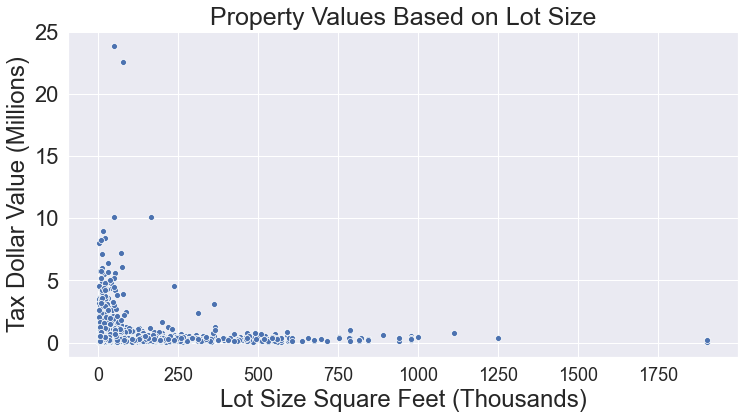

In [7]:
# creating scatterplot of lot size sq ft vs tax dollar value
sns.set(font_scale = 2)
plt.rc('xtick',labelsize = 18)
sns.scatterplot(x = train['lot_size_sq_feet'] / 1000,y = train['tax_dollar_value'] / 1000000, data = train).set_title('Property Values Based on Lot Size', fontsize = 25)
plt.ylabel('Tax Dollar Value (Millions)')
plt.xlabel('Lot Size Square Feet (Thousands)')

- Most high value properties appear to have small lot sizes
    - Perhaps many of the high value properties have small lots but are very tall, thus allowing them to have high square footage with a small lot size
- We will perform a hypothesis test (Pearson Correlation) to confirm if there is a linear relationship between these lot size and property value.

### Test: Pearson Correlation

#### Hypothesis:
H0: There is no linear relationship between lot size and home value.

Ha: There is a linear relationship between lot size and home value.

In [8]:
# declaring variables to test for correlation on
x = X_train['lot_size_sq_feet']
y = y_train['tax_dollar_value']

# performing pearson correlation test
r, p = stats.pearsonr(x, y)

# printing results
print(f'alpha = .05\n')
print(f'r = {r:.5f}')
print(f'p = {p:.3f}')

alpha = .05

r = -0.03342
p = 0.004


- Since p is less than alpha, we reject our null hypothesis that there is no linear correlation between bathroom count and home value.

- Due to the r value being so close to 0, we infer that the relationship is virtually non-existent

## Feature: bathroom_count 

### Initial idea: The value of a unit will increase if it has more than the average number of bathrooms. 

Text(0.5, 0, 'Bathroom Count')

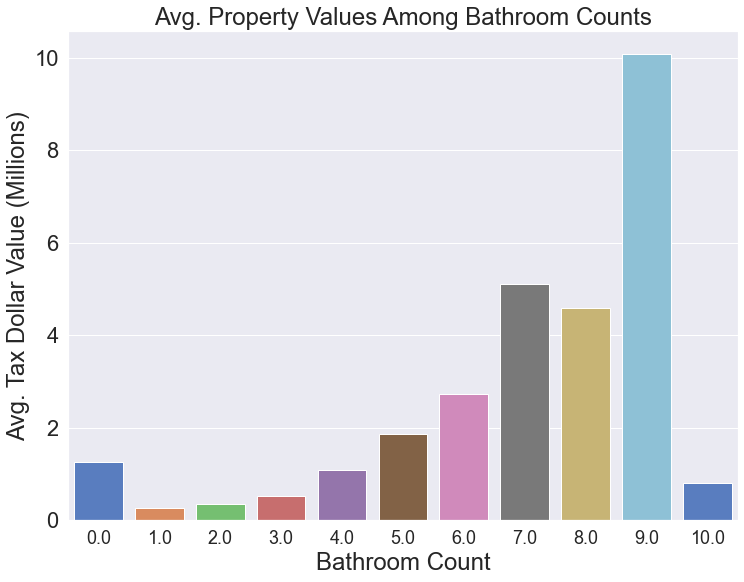

In [9]:
# creating barplot of bathroom count vs tax dollar value
plt.figure(figsize=(12,9))
sns.barplot(x = 'bathroom_count',y = train['tax_dollar_value'] / 1000000, data = train, ci = None, palette = ('muted')).set_title("Avg. Property Values Among Bathroom Counts")
sns.set(font_scale = 2)
plt.ylabel('Avg. Tax Dollar Value (Millions)')
plt.xlabel('Bathroom Count')

- Generally, property value appears to increase as the the number of bathrooms increase
- We will calculate the average number of bathrooms per property and then formulate a hypothesis using this data.

### Test: T-Test

In [10]:
# calculating average number of bathrooms per property
avg_bathroom_count = round((train.bathroom_count).mean())

print(f'The average number of bathrooms in a property is {avg_bathroom_count}.\n')
print(f'We will formulate our hypothesis on the grounds that a property has more than the average number of bathrooms if it has 3 or more.')

The average number of bathrooms in a property is 2.

We will formulate our hypothesis on the grounds that a property has more than the average number of bathrooms if it has 3 or more.


#### Hypothesis:
H0: The value of units with 3 or more bathrooms is equal to or less than the value of units with 2 or less bathrooms

Ha: The value of units with 3 or more bathrooms is greater than the value of units with 2 or less bathrooms.

In [11]:
# x1 = df of data for propertiess with 3 or more bathrooms
# x2 = df of data for properties with 2 or less bathrooms
x1 = train[train.bathroom_count > 2].tax_dollar_value
x2 = train[train.bathroom_count <= 2].tax_dollar_value

# performing t-test
t, p = stats.ttest_ind(x1, x2)

# printing results
print(f'alpha = .05\n')
print(f't = {t:.5f}')
print (f'p = {p / 2}')

alpha = .05

t = 25.07040
p = 2.0955693980555035e-133


- Since p is less than alpha and t is greater than 0 (and this is a "greater than" test), we reject our null hypothesis that the value of units with 3 or more bathrooms is equal to or less than the value of units with 2 or less bathrooms.

- In other words, there is evidence that bathroom_count is a positive driver of property value.

## Feature: bedroom_count

### Initial idea: The value of a unit will increase if it has more than the average number of bedrooms. 

In [12]:
train[train.tax_dollar_value == train.tax_dollar_value.max()]

,unit_sq_feet,bedroom_count,bathroom_count,lot_size_sq_feet,tax_dollar_value
3040,8790.0,7.0,5.0,48497.0,23858374.0


In [13]:
train[train.bedroom_count == 7]['tax_dollar_value'].mean()

3991988.4

Text(0.5, 0, 'Bedroom Count')

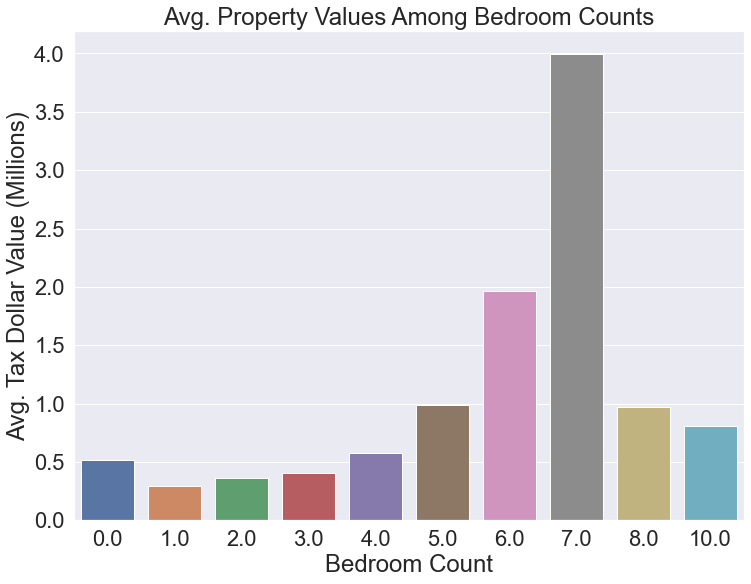

In [14]:
# creating a barplot of bedroom count vs tax dollar value
plt.figure(figsize=(12,9))
sns.barplot(x='bedroom_count', y=train['tax_dollar_value'] / 1000000, data=train, ci=None).set_title("Avg. Property Values Among Bedroom Counts")
sns.set(font_scale = 2)
plt.ylabel('Avg. Tax Dollar Value (Millions)')
plt.xlabel('Bedroom Count')

- Generally, property value appears to increase as the the number of bedrooms increase
- We will calculate the average number of bedrooms per property and then formulate a hypothesis using this data.

### Test: T-Test

In [15]:
# calculating average number of bedrooms per property
avg_bedroom_count = round((train.bedroom_count).mean())

print(f'The average number of bedrooms in a property is {avg_bedroom_count}.\n')
print(f'We will formulate our hypothesis on the grounds that a property has more than the average number of bedrooms if it has 4 or more.')

The average number of bedrooms in a property is 3.

We will formulate our hypothesis on the grounds that a property has more than the average number of bedrooms if it has 4 or more.


#### Hypothesis:

H0: The value of units with 4 or more bedrooms is equal to or less than the value of units with 3 or less bedrooms. 

Ha: The value of units with 4 or more bedrooms is greater than the value of units with less 3 or less bedrooms.

In [16]:
# x1 = df of data for propertys with 4 or more bedrooms
# x2 = df of data for propertys with 2 or less bedrooms
x1 = train[train.bedroom_count > 3].tax_dollar_value
x2 = train[train.bedroom_count <= 3].tax_dollar_value

# performing ttest
t, p = stats.ttest_ind(x1, x2)

# printing results
print(f'alpha = .05\n')
print(f't = {t:.5f}')
print (f'p = {p / 2}')

alpha = .05

t = 18.79625
p = 2.662792020085644e-77


- Since p is less than alpha and t is greater than 0, we reject our null hypothesis that the value of units with 3 or more bedrooms is equal to or less than the value of units with 2 or less bedrooms.

- In other words, there is evidence that bedroom_count is a positive driver of property value.

### Exploration Takeaways

- Heatmap of all features shows the following features are strongly correlated with property value:
    - bathroom_count
    - bedroom_count
    - unit_sq_ft
    
    
- Although lot_size_sq_ft, may not have as strong of a correlation with property value, we will still create a model with it to observe its effectiveness as a predictive feature.


- T-Tests suggest that having more than the average number of bathrooms or bedrooms in a property increases its value


- Pearson Correlation tests suggest that the size of a property and the size of the lot it's located on have an impact on its value

# Modeling
We use these variables that we believe strongly correlate with churn to create a model that will allow us to predict churn
***

## Baseline
We'll now construct a baseline and gauge its accuracy to determine what accuracy an alternate model would need in order to be viable.

In [17]:
# making a copy of train data so we can add a baseline column without changing original train DF
y_train_bl = y_train.copy()

# adding baseline_prediction column that holds the mean of property tax values
y_train_bl['baseline_prediction'] = y_train['tax_dollar_value'].mean()

y_train_bl.head()

,tax_dollar_value,baseline_prediction
6531,209099.0,475181.64038
6057,271949.0,475181.64038
2580,250933.0,475181.64038
5490,236264.0,475181.64038
1229,818000.0,475181.64038


In [33]:
RMSE_bl = np.sqrt(mean_squared_error(y_train.tax_dollar_value, y_train_bl.baseline_prediction))

print("Baseline Root mean squared error: ", round((RMSE_bl)))

Baseline Root mean squared error:  698688


- Our baseline's RMSE value is 698,688. We'll need to construct at least one model that can attain a RMSE value lower than this.

## Feature Selection
We'll be using Recursive Feature Elimination to rank each of our features in terms of their viability in predicting property value.

In [19]:
# creating linear regression object
lm = LinearRegression()

# creating RFE object that will use our linear regression object and only pick only the single best feature
rfe = RFE(lm, 1)

# transforming data using rfe object
x_rfe = rfe.fit_transform(X_train, y_train)

# fitting our linear regression model to data
lm.fit(X_train, y_train)

# storing array of boolean values that reflect true if a feature was one of the three selected
# false otherwise
mask = rfe.support_

# creating list of the top feature using boolean mask
rfe_features = X_train.loc[:,mask].columns.tolist()

# creating array of ranking list
var_ranks = rfe.ranking_

# creating list of feature names
var_names = X_train_scaled.columns.tolist()

# combine ranks and names into a df
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})

# sort the df by rank
rfe_ranks_df.sort_values('Rank')

,Var,Rank
2,bathroom_count,1
1,bedroom_count,2
0,unit_sq_feet,3
3,lot_size_sq_feet,4


- RFE shows that bathroom_count is the most useful feature for predicting property value.
- bedroom_count is second
- unit_sq_feet is third
- lot_size_sq_feet is last

## Train

### Name: Model 1 (Train)

Type: Linear Regression Model

Features:
- bathroom_count
- bedroom_count
- unit_sq_feet
- lot_size_sq_feet

Detail: None

In [20]:
# copying df to avoid changing original when we add predictions column
y_train_m1 = y_train.copy()

# creating linear regression object
lm_1 = LinearRegression()

# fitting model to data
lm_1.fit(X_train_scaled, y_train_m1)

# adding column to model 1 train that holds model 1 predictions of property value
y_train_m1['model_1_prediction'] = lm_1.predict(X_train_scaled)

# calculating RMSE value of model 1 on train data
RMSE_lm_m1 = round(np.sqrt(mean_squared_error(y_train.tax_dollar_value, y_train_m1.model_1_prediction)))

# printing results
print(f'Model 1s RMSE value when predicting property values on the train data set is {RMSE_lm_m1}')

Model 1s RMSE value when predicting property values on the train data set is 551421


### Name: Model 2  (Train)

Type: Linear Regression Model

Features:
- bathroom_count
- bedroom_count
- unit_sq_feet

Detail: Removing least most important feature according to RFE ranking (lot_size_sq_feet)

In [21]:
# copying df to avoid changing original when we add predictions column
y_train_m2 = y_train.copy()

# creating linear regression object
lm_2 = LinearRegression()

# fitting model to data
lm_2.fit(X_train_scaled[['bathroom_count', 'bedroom_count', 'unit_sq_feet']], y_train_m2)

# adding column to model 2 train that holds model 2 predictions of property value
y_train_m2['model_2_prediction'] = lm_2.predict(X_train_scaled[['bathroom_count', 'bedroom_count', 'unit_sq_feet']])

# calculating RMSE value of model 2 on train data
RMSE_lm_m2 = round(np.sqrt(mean_squared_error(y_train.tax_dollar_value, y_train_m2.model_2_prediction)))

# printing results
print(f'Model 2s RMSE value when predicting property values on the train data set is {RMSE_lm_m2}')

Model 2s RMSE value when predicting property values on the train data set is 551490


### Name: Model 3  (Train)

Type: Linear Regression Model

Features:
- bathroom_count
- bedroom_count

Detail: Removing 2 least most important features according to RFE ranking (lot_size_sq_feet and unit_sq_feet)

In [22]:
# copying df to avoid changing original when we add predictions column
y_train_m3 = y_train.copy()

# creating linear regression object
lm_3 = LinearRegression()

# fitting model to data
lm_3.fit(X_train_scaled[['bathroom_count', 'bedroom_count']], y_train_m3)

# adding column to model 3 train that holds model 3 predictions of property value
y_train_m3['model_3_prediction'] = lm_3.predict(X_train_scaled[['bathroom_count', 'bedroom_count']])

# calculating RMSE value of model 3 on train data
RMSE_lm_m3 = round(np.sqrt(mean_squared_error(y_train.tax_dollar_value, y_train_m3.model_3_prediction)))

# printing results
print(f'Model 3s RMSE value when predicting property values on the train data set is {RMSE_lm_m3}')

Model 3s RMSE value when predicting property values on the train data set is 622158


### Name: Model 4  (Train)

Type: Linear Regression Model

Features:
- bathroom_count

Detail: Removing 3 least most important features according to RFE ranking (lot_size_sq_feet, unit_sq_feet, and bedroom_count)

In [23]:
# copying df to avoid changing original when we add predictions column
y_train_m4 = y_train.copy()

# creating linear regression object
lm_4 = LinearRegression()

# fitting model to data
lm_4.fit(X_train_scaled[['bathroom_count']], y_train_m4)

# adding column to model 4 train that holds model 3 predictions of property value
y_train_m4['model_4_prediction'] = lm_4.predict(X_train_scaled[['bathroom_count']])

# calculating RMSE value of model 4 on train data
RMSE_lm_m4 = round(np.sqrt(mean_squared_error(y_train.tax_dollar_value, y_train_m4.model_4_prediction)))

# printing results
print(f'Model 4s RMSE value when predicting property values on the train data set is {RMSE_lm_m4}')

Model 4s RMSE value when predicting property values on the train data set is 622171


- Baseline RMSE: 698688

- Model 1 RMSE: 551421

- Model 2 RMSE: 551490

- Model 3 RMSE: 622158

- Model 4 RMSE: 622171

- Models 1 and 2 had the best (lowest) RMSE values so we'll be using them to predict values in the validate sample.

## Validation
__Hyperparameter Tuning: The default hyperparameters for these models (default set by not listing any), produced the lowest RMSE values so no changes will be made to the hyperparamter settings of the models.__

### Model 1 (Validation)

In [24]:
# creating copy of y_validate DF to avoid altering the original when we add our predictions column
y_validate_m1 = y_validate.copy()

# adding column to model 1 train that holds model 1 predictions of property value
y_validate_m1['model_1_prediction'] = lm_1.predict(X_validate_scaled)

# calculating RMSE value of model 1 on validate data
RMSE_lm_m1_val = round(np.sqrt(mean_squared_error(y_validate.tax_dollar_value, y_validate_m1.model_1_prediction)))

# printing results
print(f'Model 1s RMSE value when predicting property values on the train data set is {RMSE_lm_m1_val}')

Model 1s RMSE value when predicting property values on the train data set is 674204


### Model 2 (Validation)

In [25]:
# creating copy of y_validate DF to avoid altering the original when we add our predictions column
y_validate_m2 = y_validate.copy()

# adding column to model 2 train that holds model 2 predictions of property value
y_validate_m2['model_2_prediction'] = lm_2.predict(X_validate_scaled[['bathroom_count', 'bedroom_count', 'unit_sq_feet']])

# calculating RMSE value of model 2 on validate data
RMSE_lm_m2_val = round(np.sqrt(mean_squared_error(y_validate.tax_dollar_value, y_validate_m2.model_2_prediction)))

# printing results
print(f'Model 2s RMSE value when predicting property values on the train data set is {RMSE_lm_m2_val}')

Model 2s RMSE value when predicting property values on the train data set is 674829


- Model 1 RMSE: 674204

- Model 2 RMSE: 674829

- Models 1 had the best (lowest) RMSE value so we will be using it to predict values in the test sample.

## Test

### Model 1 (Test)

In [26]:
# creating copy of y_test DF to avoid altering the original when we add our predictions column
y_test_m1 = y_test.copy()

# adding column to model 1 train that holds model 1 predictions of property value
y_test_m1['model_1_prediction'] = lm_1.predict(X_test_scaled)

# calculating RMSE value of model 1 on validate data
RMSE_lm_m1_test = round(np.sqrt(mean_squared_error(y_test.tax_dollar_value, y_test_m1.model_1_prediction)))

# printing results
print(f'Model 1s RMSE value when predicting property values on the train data set is {RMSE_lm_m1_test}')

Model 1s RMSE value when predicting property values on the train data set is 558304


- Model 1 RMSE value (Train): 551421
- Model 1 RMSE value (Validate): 674204
- Model 1 RMSE value (Test): 558304

## Modeling Takeaways   
- Model 1's performance (RMSE value) on the test data set was much better than its performance on the validation data set and very close to its performance on the train data set.


- Since Model 1's performance on all 3 datasets is superior to the baseline's performance, it is safe to say that that model 1 should be used instead of the baseline to predict property values.


- Model 1 used all 4 of our features from our exploration phase and performed better than any model that used less features. 
    - This is further evidence that each of those features (bathroom_count, bedroom_count, unit_sq_feet, lot_size_sq_feet) are drivers of property value.

# Overall Conclusion and Takeaways

- Through exploration we discovered that drivers of property value include bathroom_count, bedroom_count, unit_sq_feet, and lot_size_sq_feet
    
- Based on the results of a pearson correlation test, lot_size_sq_feet was thought to have virtually no relationship with property_value, our models performed worse without it

Recursive Feature Elimination ranked the importance of each feature in predicting value as follows:

- 1 - bathroom_count
- 2 - bedroom_count
- 3 - unit_sq_feet
- 4 - lot_size_sq_feet

Recommendations
- When assessing the value of properties, we should focus our attention on these drivers to help improve the accuracy of our value assessments.
- We should also display these features more prominently in our search result thumbnails as currently the font is relatively small.

We've created a linear regression model that uses these variables to predict property values.
- The model outperformed a baseline model that constantly predicts the mean value of homes
- The model's RMSE value on all data sets was consistently lower than all of its competitors 
- In one instance, the model only performed nearly as well on data it had never seen before (test) than it did on the data it was trained on (train). 

In the future
- We'd like to collect a wider range of data since many of the features in our dataset contained a high amount of null values and had to be excluded from our project.
    - With more features available, we may be able to incorporate new ones that improve our model's ability to make accurate predictions on property values.